In [22]:
!pip install Cartopy
!pip install pyqt5
!pip install Pillow

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from matplotlib.animation import FuncAnimation
# matplotlib.use('TkAgg')
import cartopy.crs as ccrs
import glob
from PIL import Image
BAD_FLAG = -1.e+34

In [24]:
files_for_zonal=glob.glob("./Zonal/*.txt")
files_for_meridional=glob.glob("./Meridional/*.txt")
files_for_meridional.sort()
files_for_zonal.sort()
files_for_meridional,files_for_zonal

(['./Meridional\\Feb-06-2012.txt',
  './Meridional\\Feb-07-2012.txt',
  './Meridional\\Feb-08-2012.txt',
  './Meridional\\Feb-09-2012.txt',
  './Meridional\\Feb-10-2012.txt',
  './Meridional\\Feb-11-2012.txt',
  './Meridional\\Feb-12-2012.txt'],
 ['./Zonal\\Feb-06-2012.txt',
  './Zonal\\Feb-07-2012.txt',
  './Zonal\\Feb-08-2012.txt',
  './Zonal\\Feb-09-2012.txt',
  './Zonal\\Feb-10-2012.txt',
  './Zonal\\Feb-11-2012.txt',
  './Zonal\\Feb-12-2012.txt'])

In [25]:
dfzonallist=[]
dfmeridionallist=[]

In [26]:
def change(x):
    x=x.replace("S","")
    x="-"+x
    return x

for fil1,fil2 in zip(files_for_zonal,files_for_meridional):
    
    dfv=pd.read_table(fil1,header=6)
    dfu=pd.read_table(fil2,header=6)
    columnsspeed={}
    columnsindex={}

    for col in dfv.columns:
        newcol=col.replace(" ","")
        if 'E' in newcol: 
            finalcol=newcol.replace("E", "")
            columnsspeed[col]=finalcol
        elif 'W' in newcol: 
            finalcol=newcol.replace("W","")
            finalcol="-"+finalcol
            columnsspeed[col]=finalcol
        else:
            columnsspeed[col]=newcol
    
    
    dfv=dfv.rename(columns=columnsspeed)
    dfu=dfu.rename(columns=columnsspeed)

    dfv['']=dfv[''].apply(lambda x : x.replace("N","") if 'N' in x else x)
    dfv['']=dfv[''].apply(lambda x : change(x) if 'S' in x else x )
    dfu['']=dfu[''].apply(lambda x : x.replace("N","") if 'N' in x else x)
    dfu['']=dfu[''].apply(lambda x : change(x) if 'S' in x else x )
    dfv=dfv.set_index('')
    dfu=dfu.set_index('')
    dfu.index=dfu.index.astype(float)
    dfv.index=dfv.index.astype(float)
    dfv=dfv.replace(BAD_FLAG,np.nan) #np.nan
    dfu=dfu.replace(BAD_FLAG,np.nan)

    dfzonallist.append(dfv)
    dfmeridionallist.append(dfu)

dfzonallist,dfmeridionallist

([         0  0.5   1  1.5   2  2.5   3  3.5   4  4.5  ...  -4.5  -4  -3.5  -3  \
                                                       ...                       
  -89.75 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
  -89.25 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
  -88.75 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
  -88.25 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
  -87.75 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
  ...     ..  ...  ..  ...  ..  ...  ..  ...  ..  ...  ...   ...  ..   ...  ..   
   87.75 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
   88.25 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
   88.75 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
   89.25 NaN  NaN NaN  NaN NaN  NaN NaN  NaN NaN  NaN  ...   NaN NaN   NaN NaN   
   89.75 NaN  Na

In [49]:
dfmeridionallist[0].iloc[50:100, 200:260]

100  100.5    101  101.5    102  102.5    103  103.5    104  104.5  \
                                                                               
-64.75 -1.363 -1.509 -1.706 -1.865 -1.998 -2.177 -2.473 -2.941 -3.519 -3.978   
-64.25 -1.539 -1.571 -1.601 -1.576 -1.548 -1.594 -1.762 -2.054 -2.462 -2.820   
-63.75 -1.837 -1.785 -1.697 -1.546 -1.396 -1.331 -1.380 -1.536 -1.815 -2.066   
-63.25 -2.217 -2.098 -1.926 -1.710 -1.508 -1.351 -1.296 -1.369 -1.553 -1.747   
-62.75 -2.591 -2.424 -2.223 -1.980 -1.734 -1.511 -1.381 -1.399 -1.521 -1.650   
-62.25 -2.852 -2.675 -2.478 -2.238 -1.962 -1.696 -1.520 -1.496 -1.579 -1.651   
-61.75 -2.953 -2.779 -2.601 -2.388 -2.106 -1.817 -1.625 -1.591 -1.640 -1.661   
-61.25 -2.916 -2.752 -2.583 -2.393 -2.131 -1.846 -1.660 -1.637 -1.670 -1.654   
-60.75 -2.775 -2.624 -2.455 -2.266 -2.016 -1.743 -1.579 -1.589 -1.621 -1.586   
-60.25 -2.589 -2.412 -2.228 -2.035 -1.790 -1.525 -1.389 -1.420 -1.462 -1.452   
-59.75 -2.310 -2.130 -1.937 -1.740 -1.505 -1.253 -1.132 -1.150 -1.191 -1.255   
-59.25 -1.965 -1.817 -1.625 -1.413 -1.194 -0.967 -0.843 -0.833 -0.865 -0.969   
-58.75 -1.580 -1.503 -1.309 -1.119 -0.945 -0.736 -0.598 -0.555 -0.570 -0.687   
-58.25 -1.241 -1.195 -1.043 -0.917 -0.809 -0.640 -0.492 -0.411 -0.414 -0.529   
-57.75 -0.928 -0.896 -0.837 -0.796 -0.770 -0.673 -0.542 -0.435 -0.442 -0.582   
-57.25 -0.631 -0.650 -0.673 -0.707 -0.753 -0.740 -0.656 -0.580 -0.630 -0.799   
-56.75 -0.386 -0.455 -0.511 -0.583 -0.679 -0.739 -0.741 -0.764 -0.896 -1.118   
-56.25 -0.253 -0.309 -0.367 -0.455 -0.583 -0.684 -0.785 -0.952 -1.201 -1.465   
-55.75 -0.248 -0.248 -0.270 -0.363 -0.502 -0.621 -0.824 -1.131 -1.490 -1.814   
-55.25 -0.325 -0.254 -0.193 -0.230 -0.333 -0.499 -0.819 -1.251 -1.683 -2.057   
-54.75 -0.435 -0.255 -0.107 -0.105 -0.207 -0.399 -0.746 -1.231 -1.725 -2.171   
-54.25 -0.587 -0.308 -0.090 -0.056 -0.156 -0.325 -0.622 -1.121 -1.686 -2.219   
-53.75 -0.832 -0.478 -0.220 -0.138 -0.203 -0.337 -0.567 -1.051 -1.648 -2.230   
-53.25 -1.111 -0.763 -0.528 -0.417 -0.382 -0.439 -0.639 -1.098 -1.712 -2.304   
-52.75 -1.366 -1.096 -0.944 -0.845 -0.737 -0.627 -0.749 -1.222 -1.857 -2.428   
-52.25 -1.627 -1.412 -1.353 -1.299 -1.157 -0.947 -0.959 -1.373 -1.980 -2.521   
-51.75 -1.860 -1.660 -1.621 -1.602 -1.484 -1.286 -1.270 -1.569 -2.077 -2.572   
-51.25 -2.045 -1.830 -1.762 -1.720 -1.631 -1.520 -1.556 -1.779 -2.175 -2.593   
-50.75 -2.143 -1.909 -1.795 -1.740 -1.680 -1.633 -1.726 -1.884 -2.197 -2.559   
-50.25 -2.121 -1.912 -1.832 -1.762 -1.702 -1.713 -1.820 -1.916 -2.169 -2.486   
-49.75 -2.095 -1.924 -1.842 -1.758 -1.732 -1.751 -1.827 -1.919 -2.121 -2.381   
-49.25 -2.078 -1.936 -1.831 -1.746 -1.747 -1.751 -1.776 -1.880 -2.051 -2.207   
-48.75 -1.988 -1.890 -1.792 -1.725 -1.728 -1.719 -1.705 -1.790 -1.935 -2.022   
-48.25 -1.864 -1.812 -1.762 -1.702 -1.668 -1.647 -1.641 -1.687 -1.789 -1.842   
-47.75 -1.784 -1.776 -1.763 -1.686 -1.594 -1.588 -1.615 -1.626 -1.658 -1.643   
-47.25 -1.786 -1.799 -1.801 -1.694 -1.588 -1.568 -1.594 -1.611 -1.537 -1.418   
-46.75 -1.891 -1.886 -1.859 -1.751 -1.643 -1.579 -1.572 -1.556 -1.423 -1.163   
-46.25 -2.056 -2.041 -1.956 -1.873 -1.758 -1.619 -1.527 -1.450 -1.267 -0.931   
-45.75 -2.237 -2.220 -2.112 -1.997 -1.877 -1.692 -1.499 -1.324 -1.055 -0.684   
-45.25 -2.408 -2.413 -2.286 -2.118 -1.971 -1.757 -1.479 -1.178 -0.845 -0.464   
-44.75 -2.536 -2.551 -2.451 -2.262 -2.053 -1.781 -1.427 -1.052 -0.708 -0.318   
-44.25 -2.566 -2.576 -2.531 -2.384 -2.130 -1.795 -1.391 -0.983 -0.625 -0.255   
-43.75 -2.550 -2.494 -2.460 -2.391 -2.174 -1.826 -1.415 -1.026 -0.689 -0.338   
-43.25 -2.491 -2.363 -2.311 -2.278 -2.149 -1.862 -1.486 -1.140 -0.835 -0.507   
-42.75 -2.375 -2.219 -2.139 -2.102 -2.036 -1.851 -1.557 -1.230 -0.930 -0.634   
-42.25 -2.180 -2.051 -1.971 -1.925 -1.875 -1.745 -1.506 -1.204 -0.904 -0.621   
-41.75 -1.934 -1.844 -1.778 -1.735 -1.671 -1.535 -1.301 -1.007 -0.716 -0.449   
-41.25 -1.705 -1.615 -1.545 -1.483 -1.387 -1.223 -0.963 -0.664 -0.388 -0.134   
-40.75 -1.

In [73]:
def plotQuiver(i):
    # 120:150,60:100
    # 50:100, 350:410
    dfu=dfzonallist[i].iloc[120:150,60:100]
    dfv=dfmeridionallist[i].iloc[120:150,60:100]
    
    lat=np.array(dfu.columns.unique())
    lon=np.array(dfu.index)

    lat=lat.astype(np.float64)
    lon=lon.astype(np.float64)

    lat,lon=np.meshgrid(lat,lon)
    U=np.array(dfu)
    V=np.array(dfv)

    fig,ax=plt.subplots(figsize=(20,20))
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_title(files_for_meridional[i].split(".txt")[0][13:])
    quiv = plt.quiver(lat, lon, U, V, scale=230)
    plt.savefig("./Images/"+files_for_meridional[i].split(".txt")[0][13:]+".png",bbox_inches='tight')
    return quiv,ax

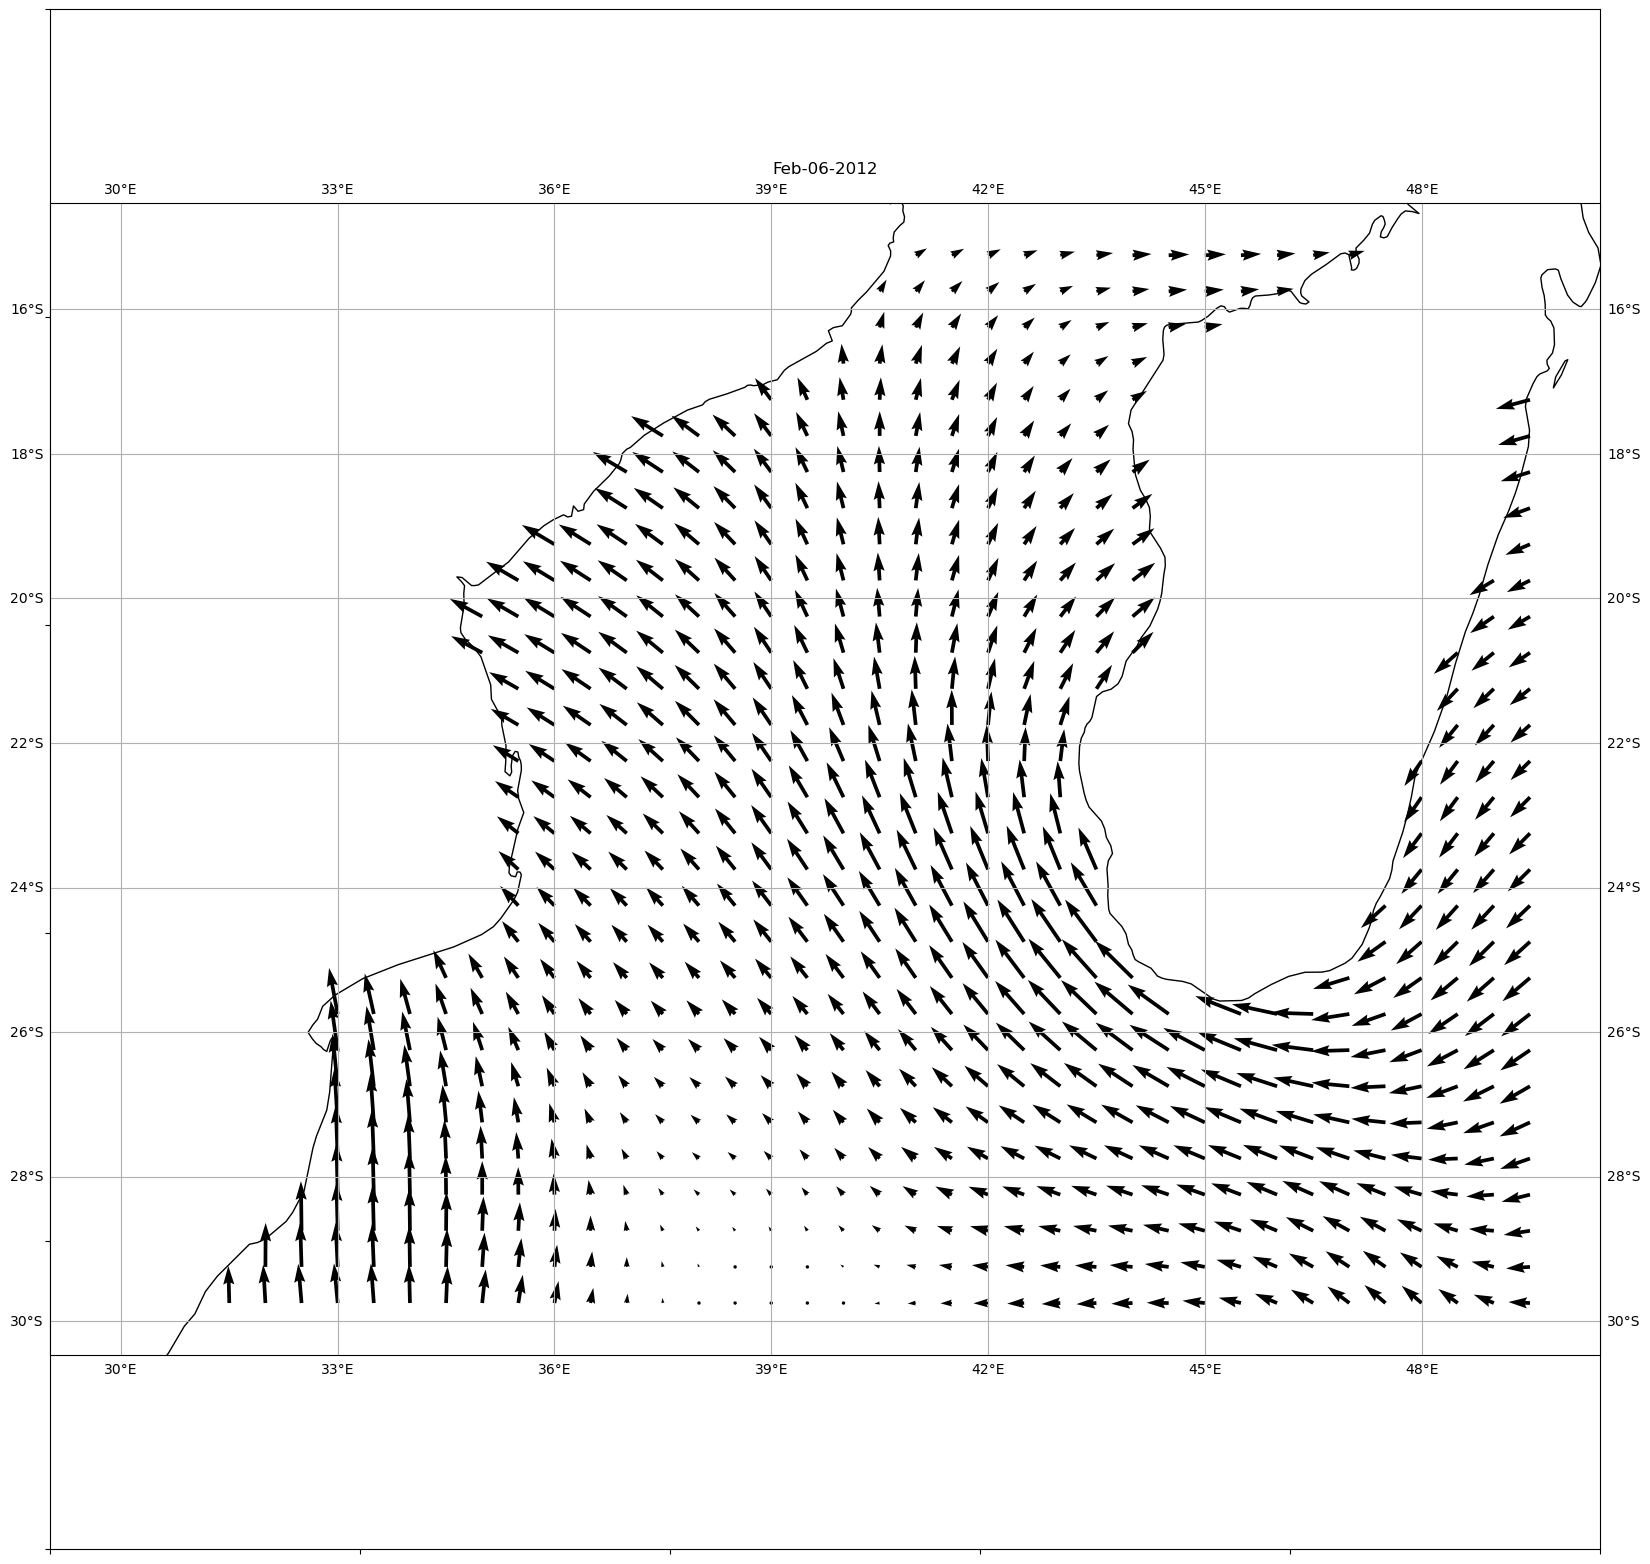

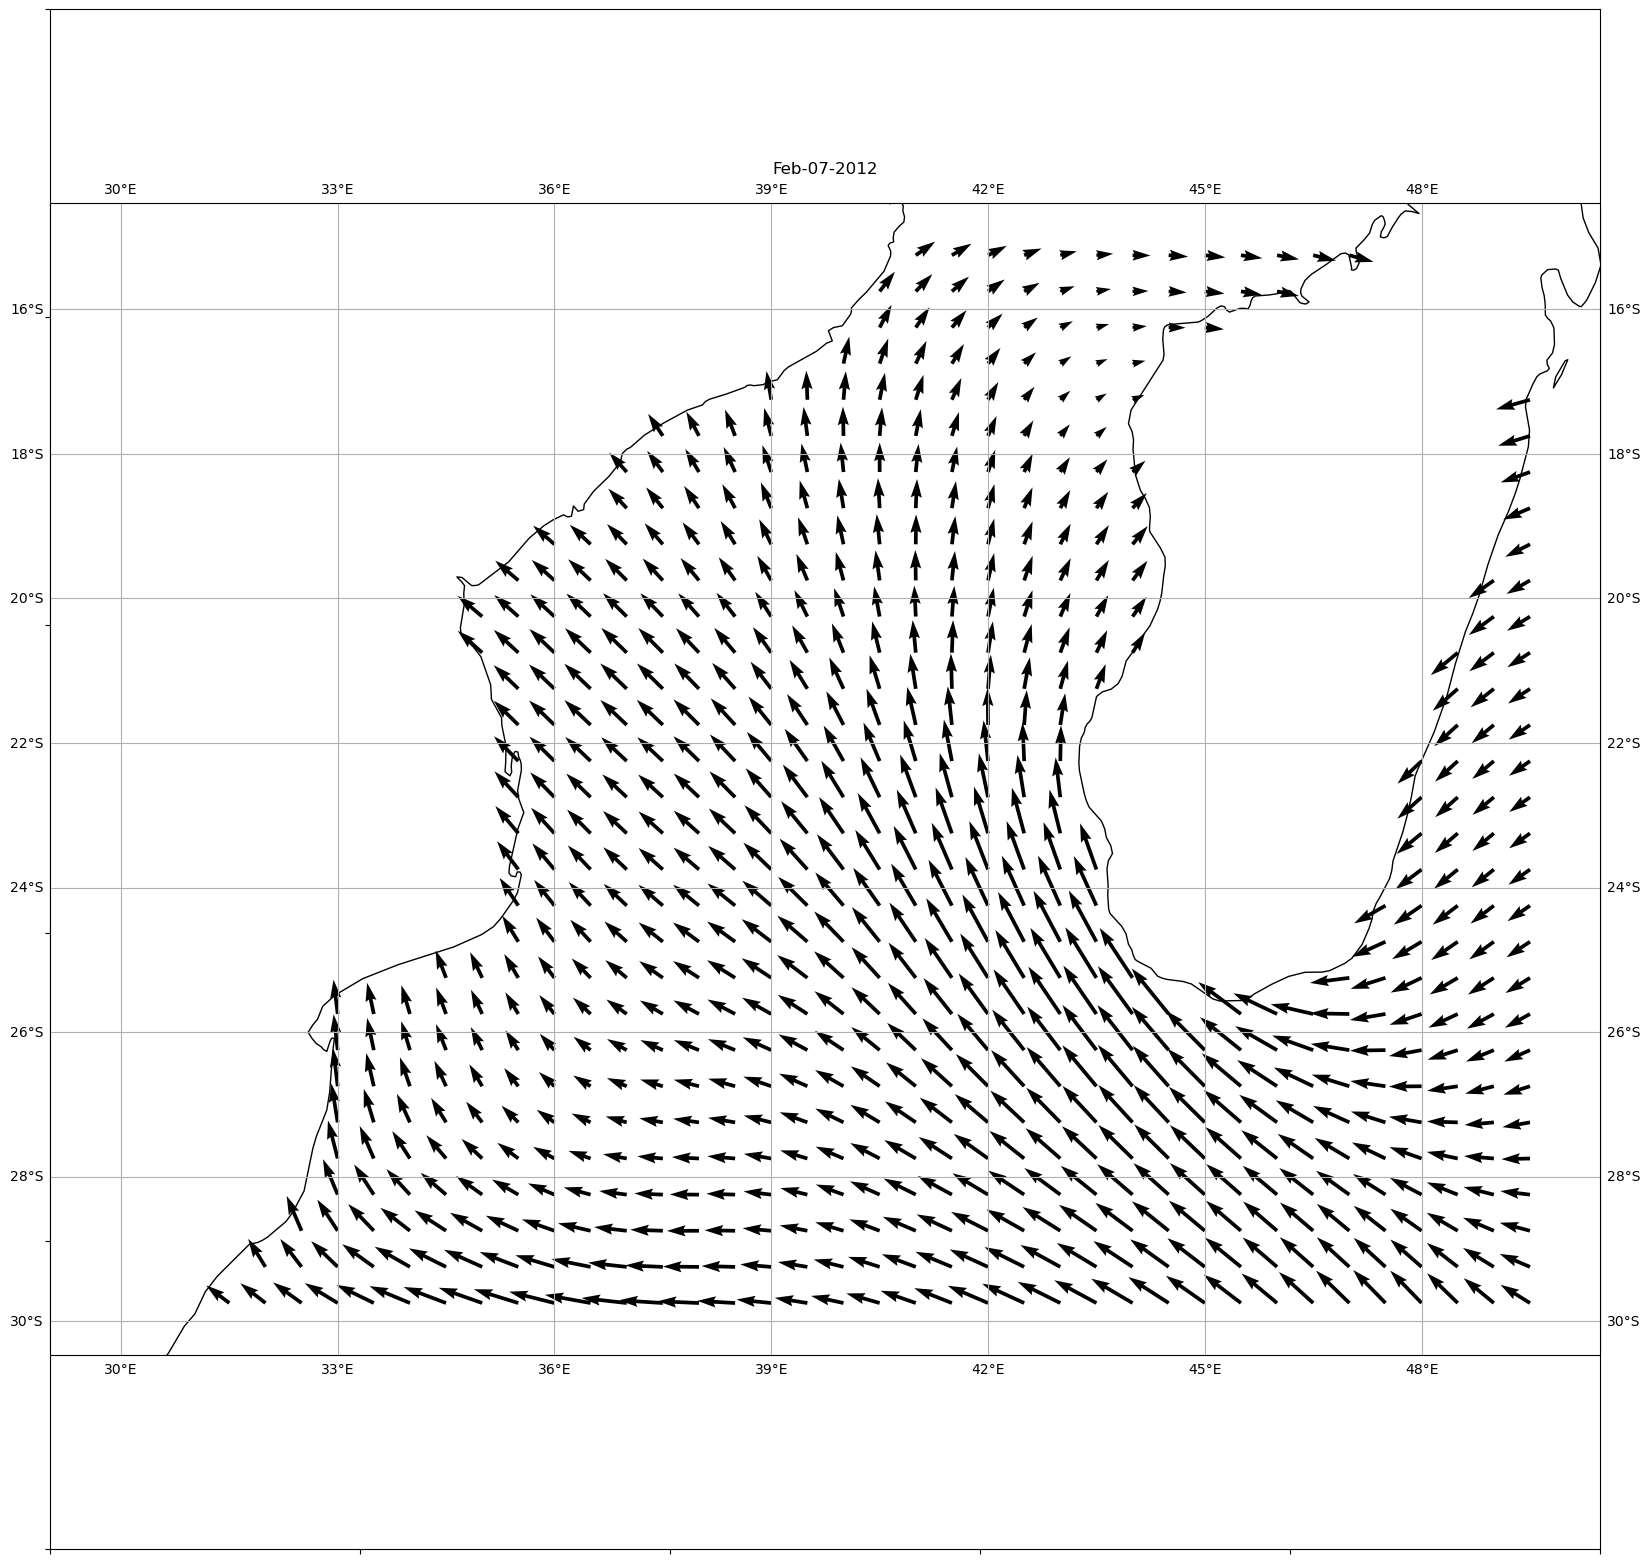

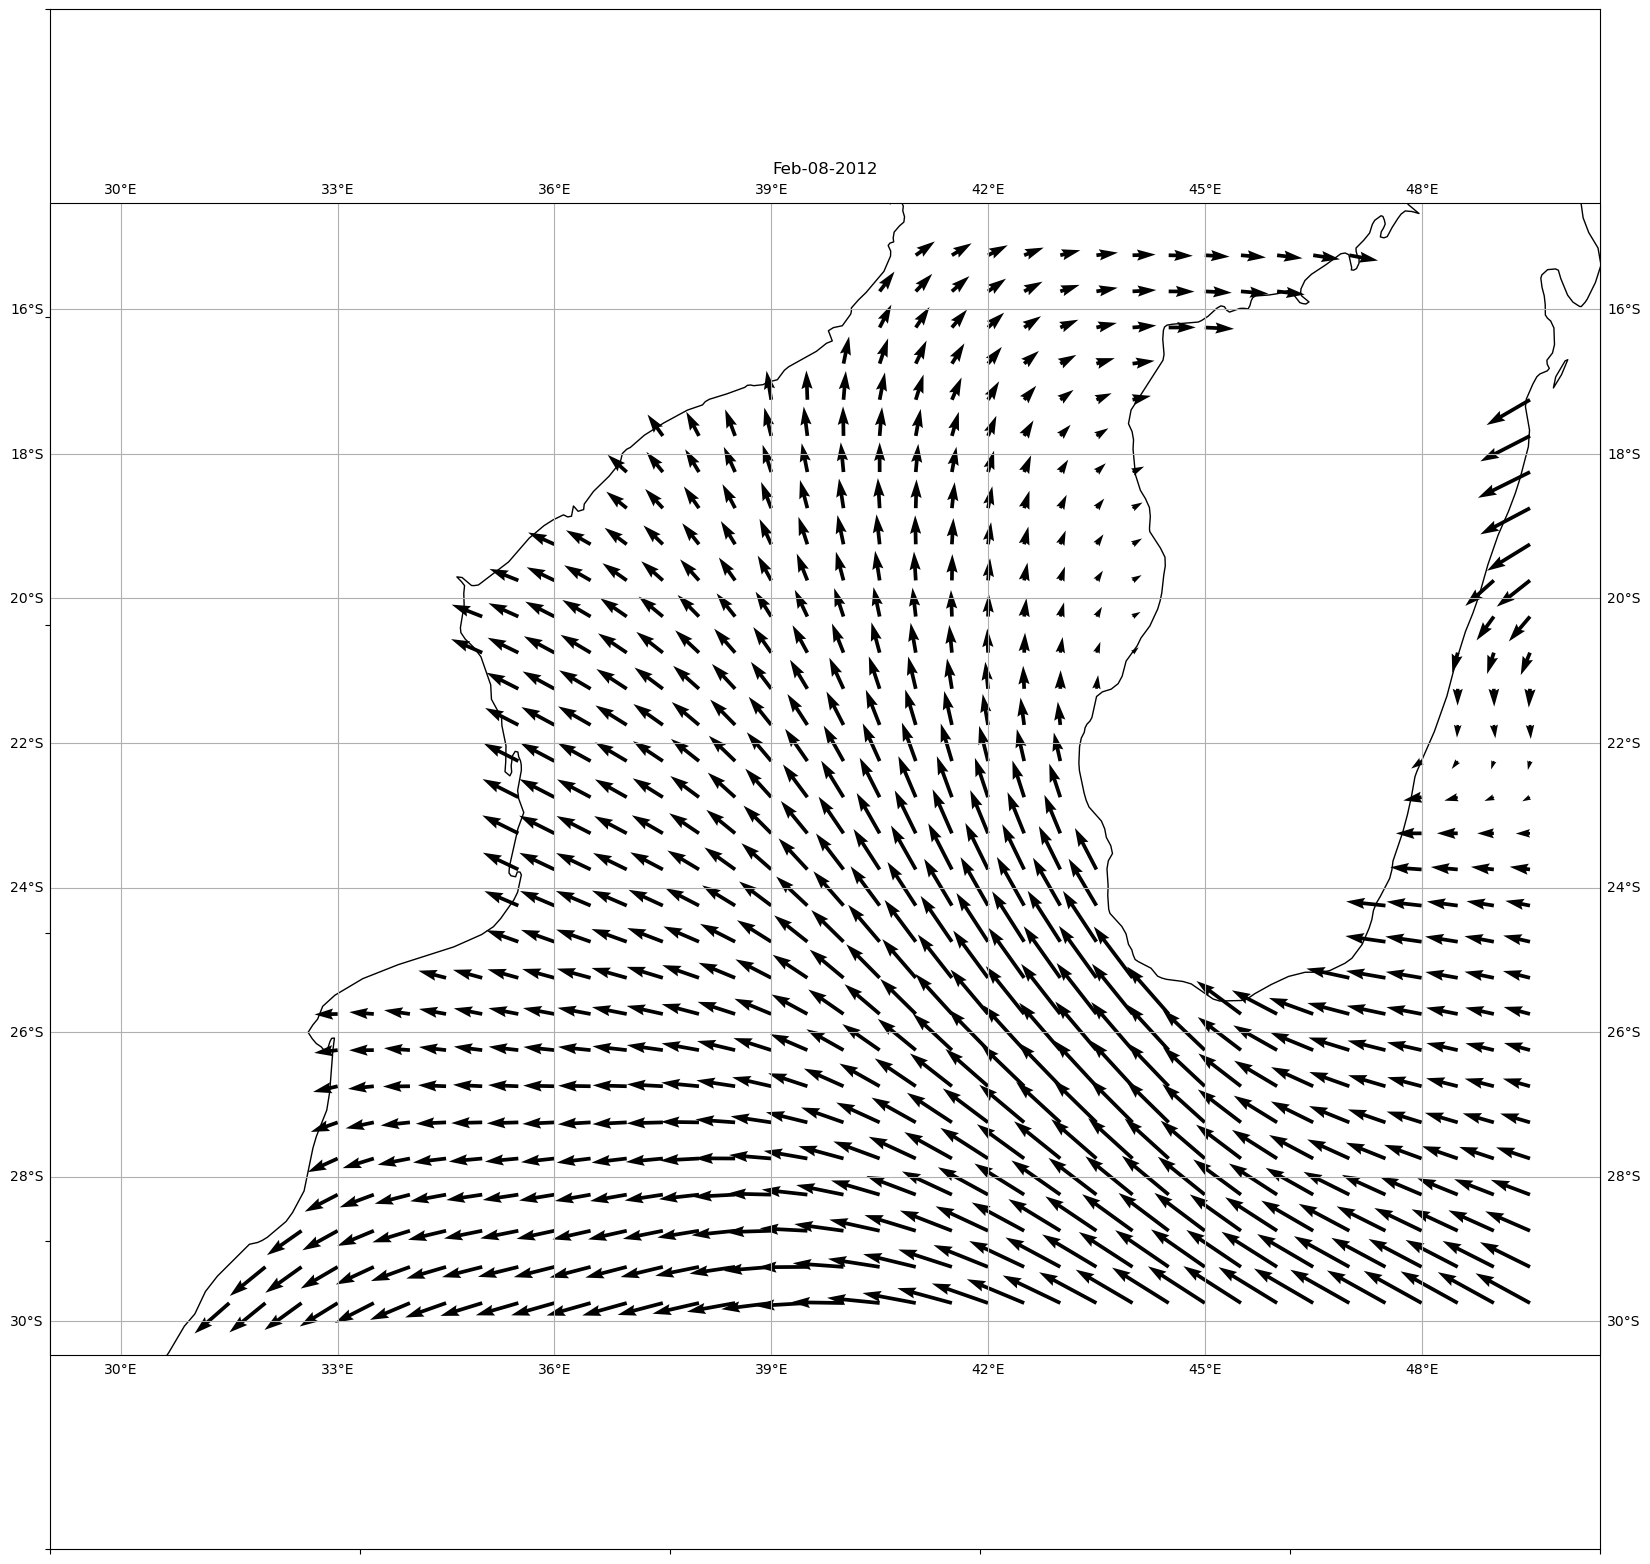

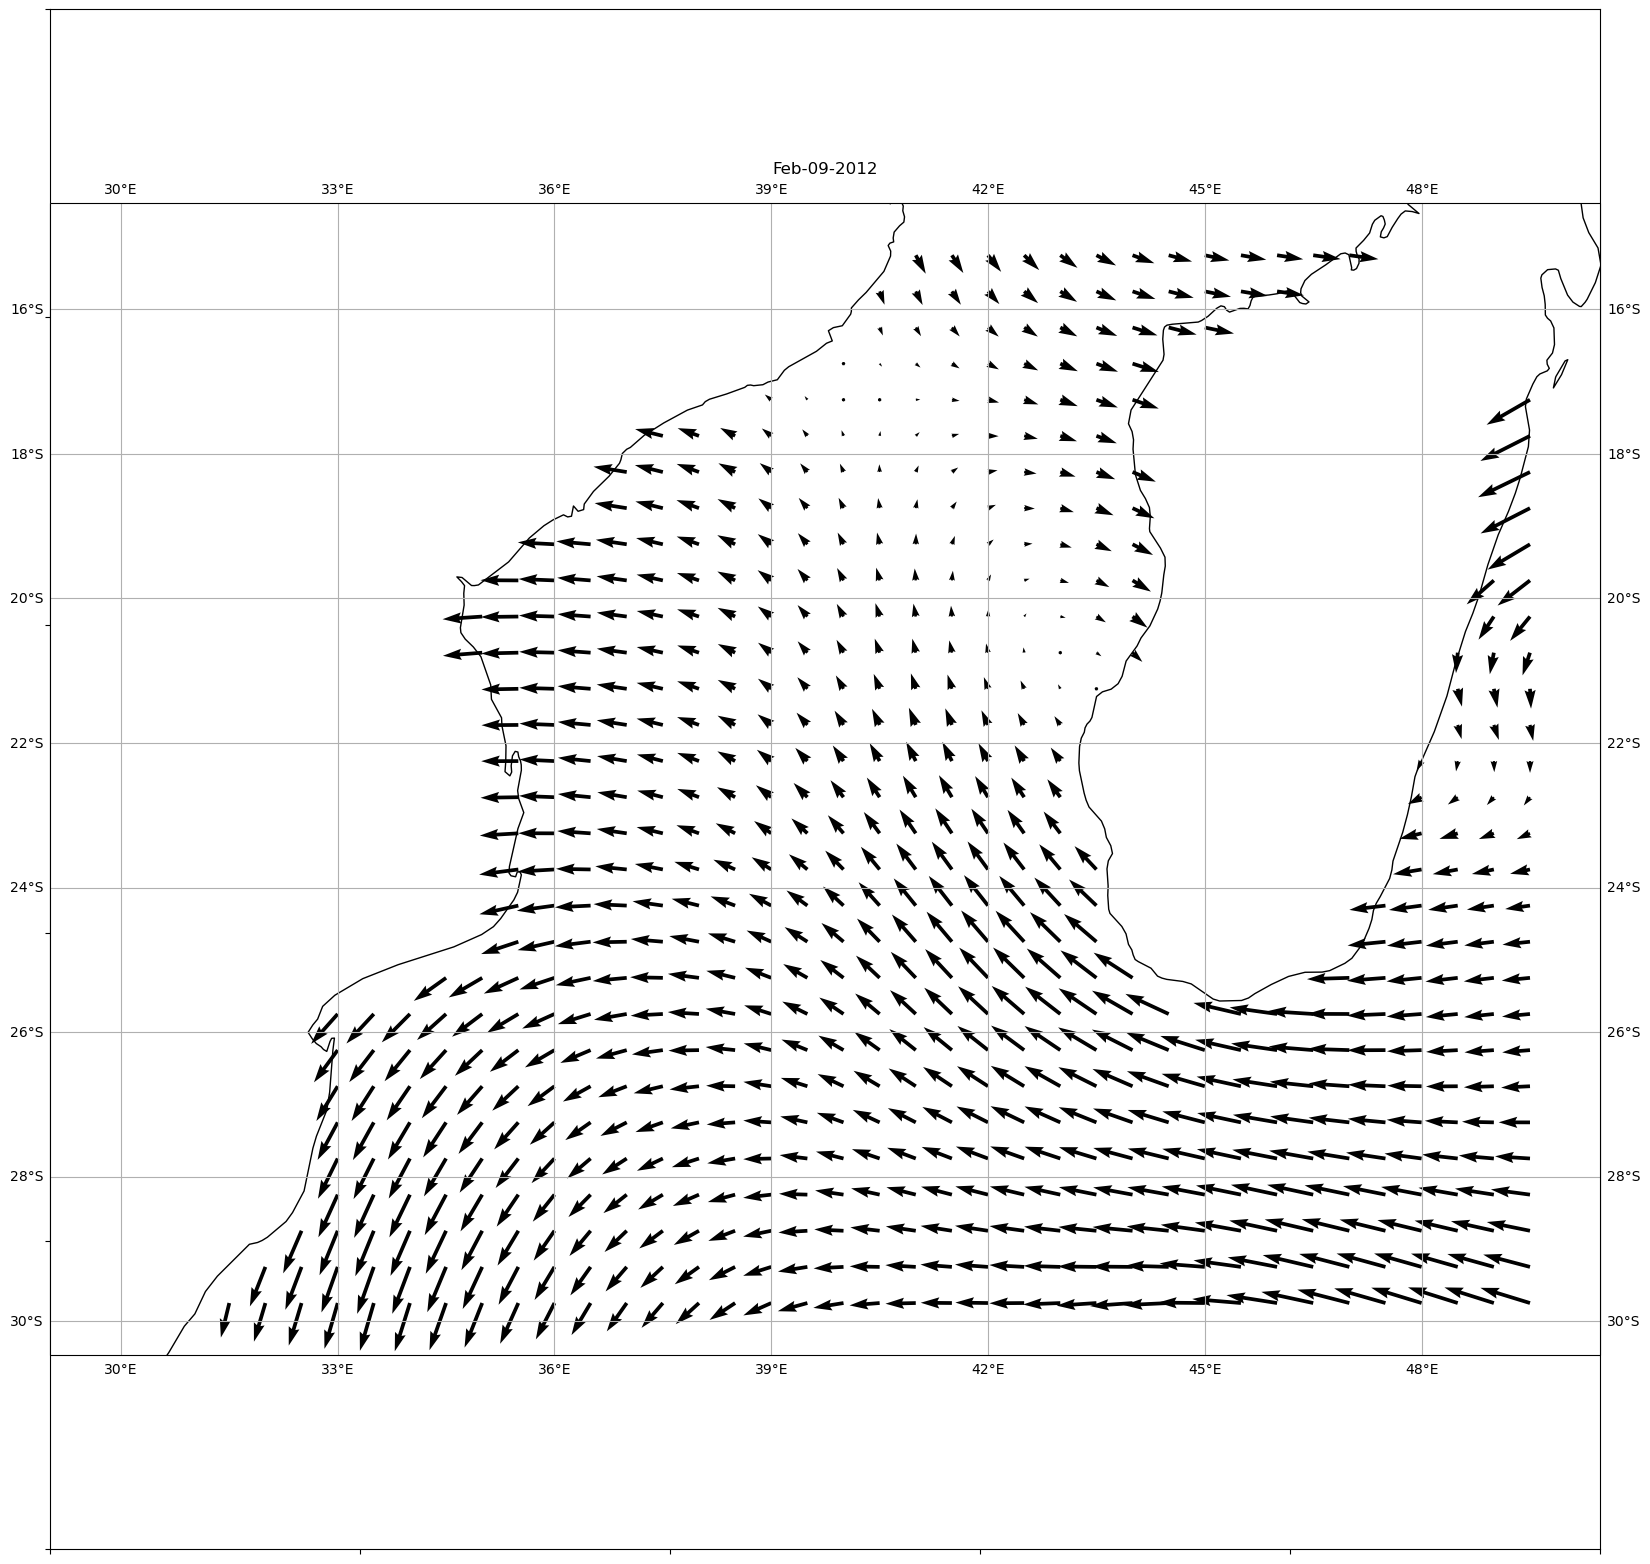

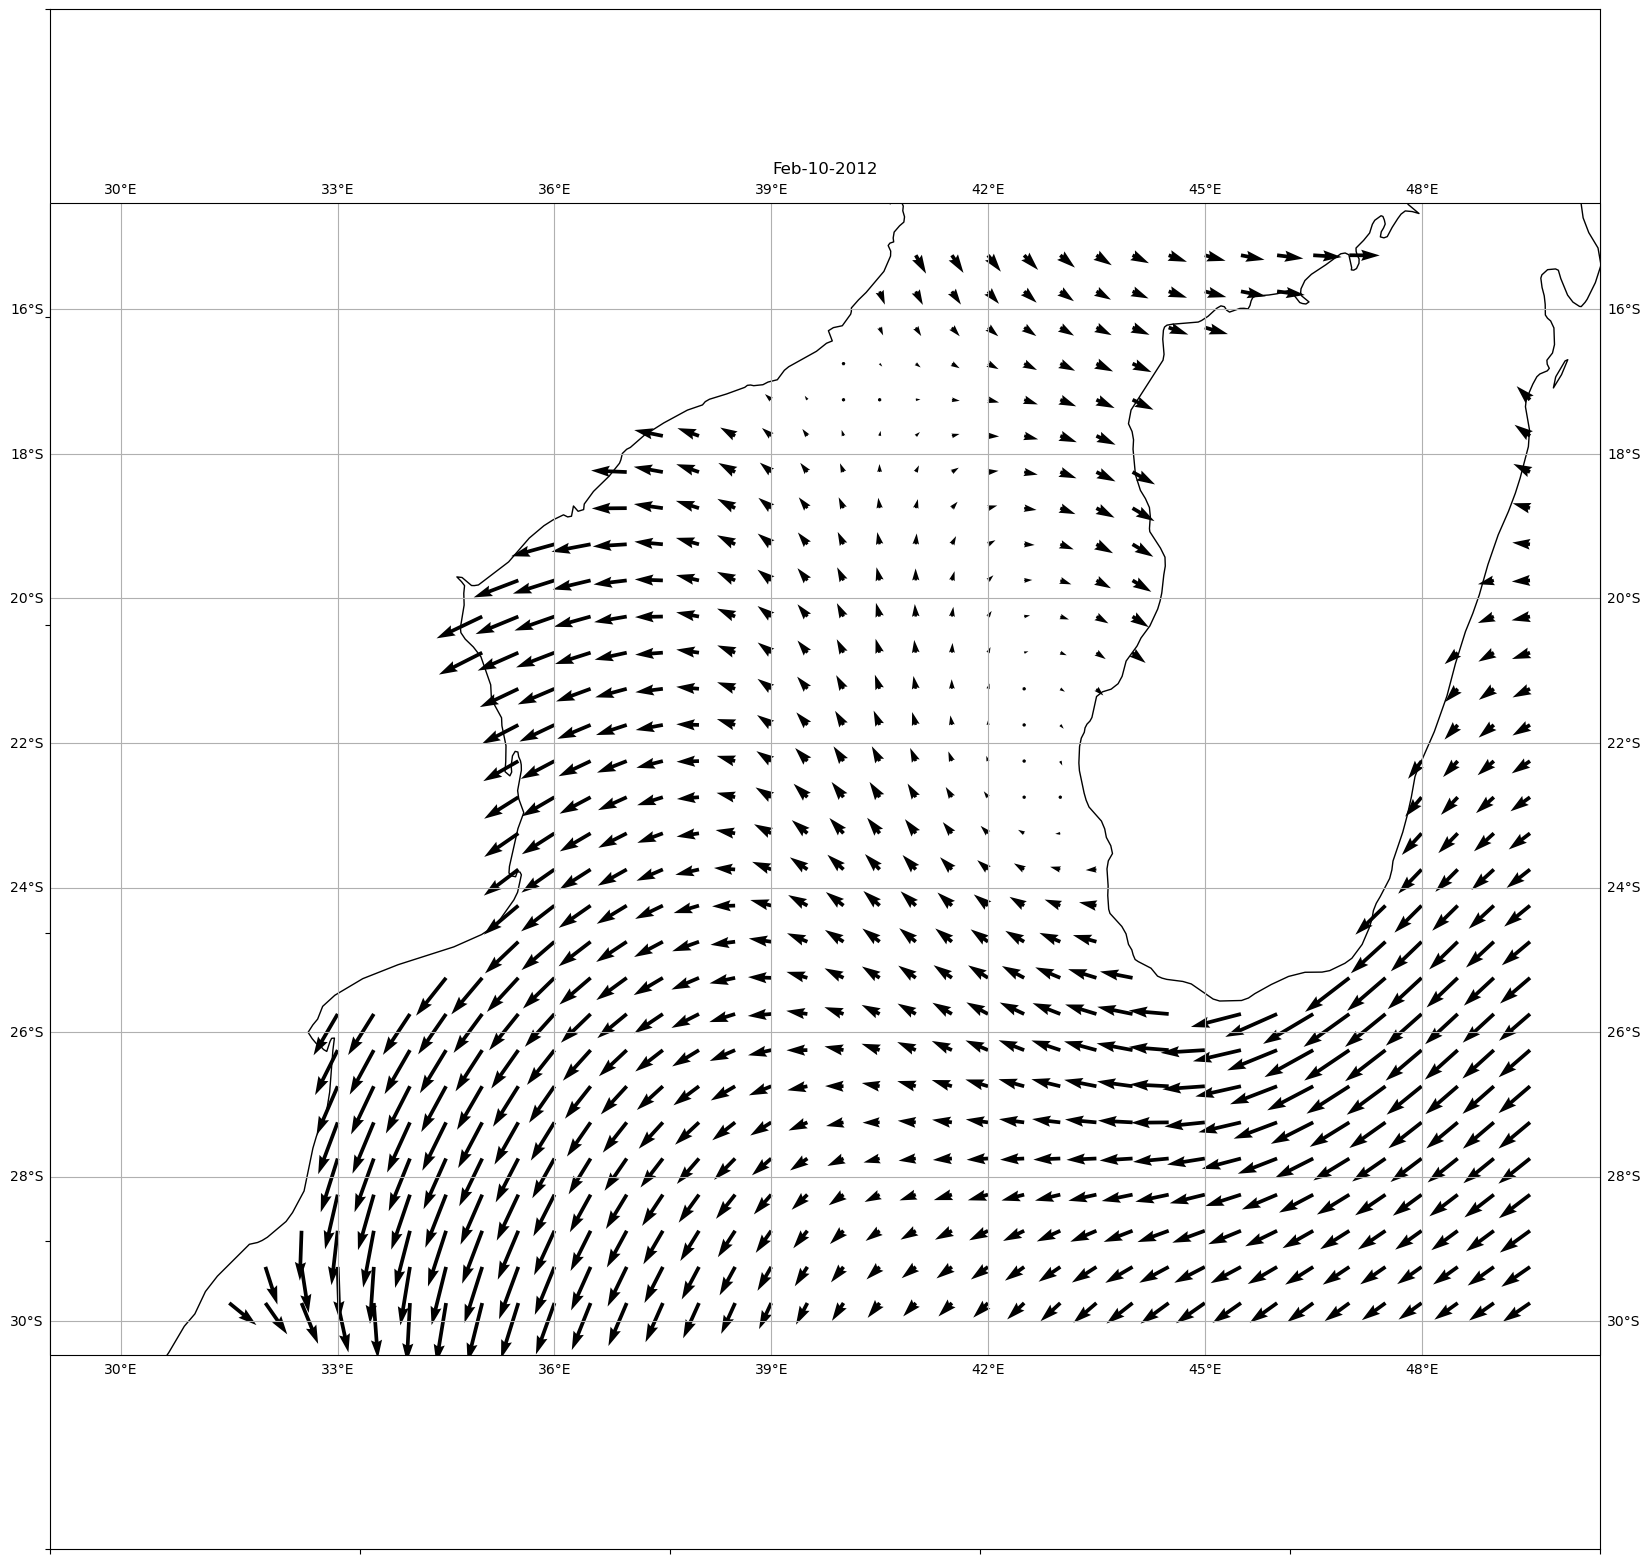

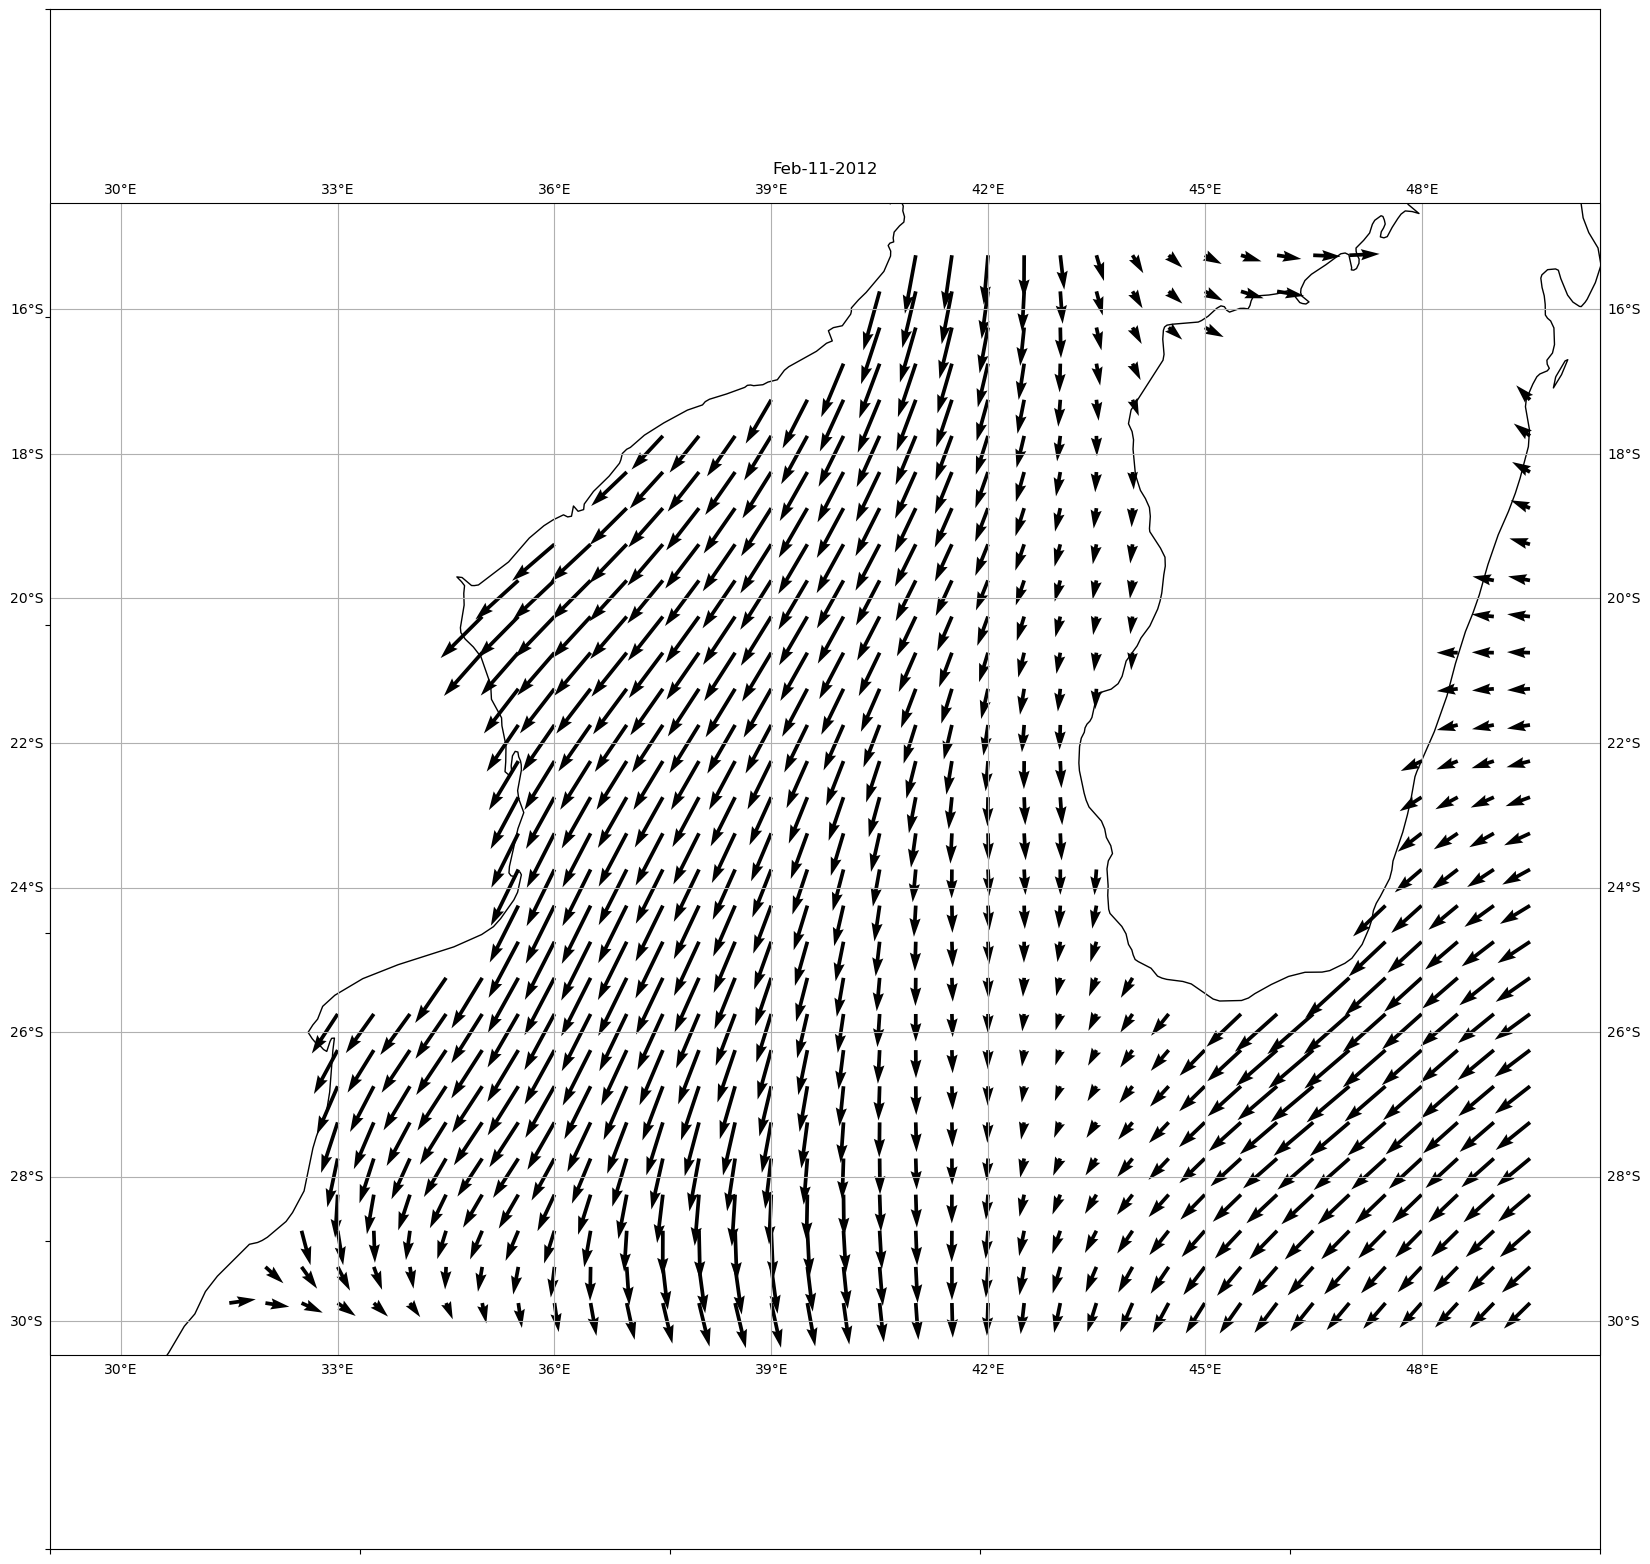

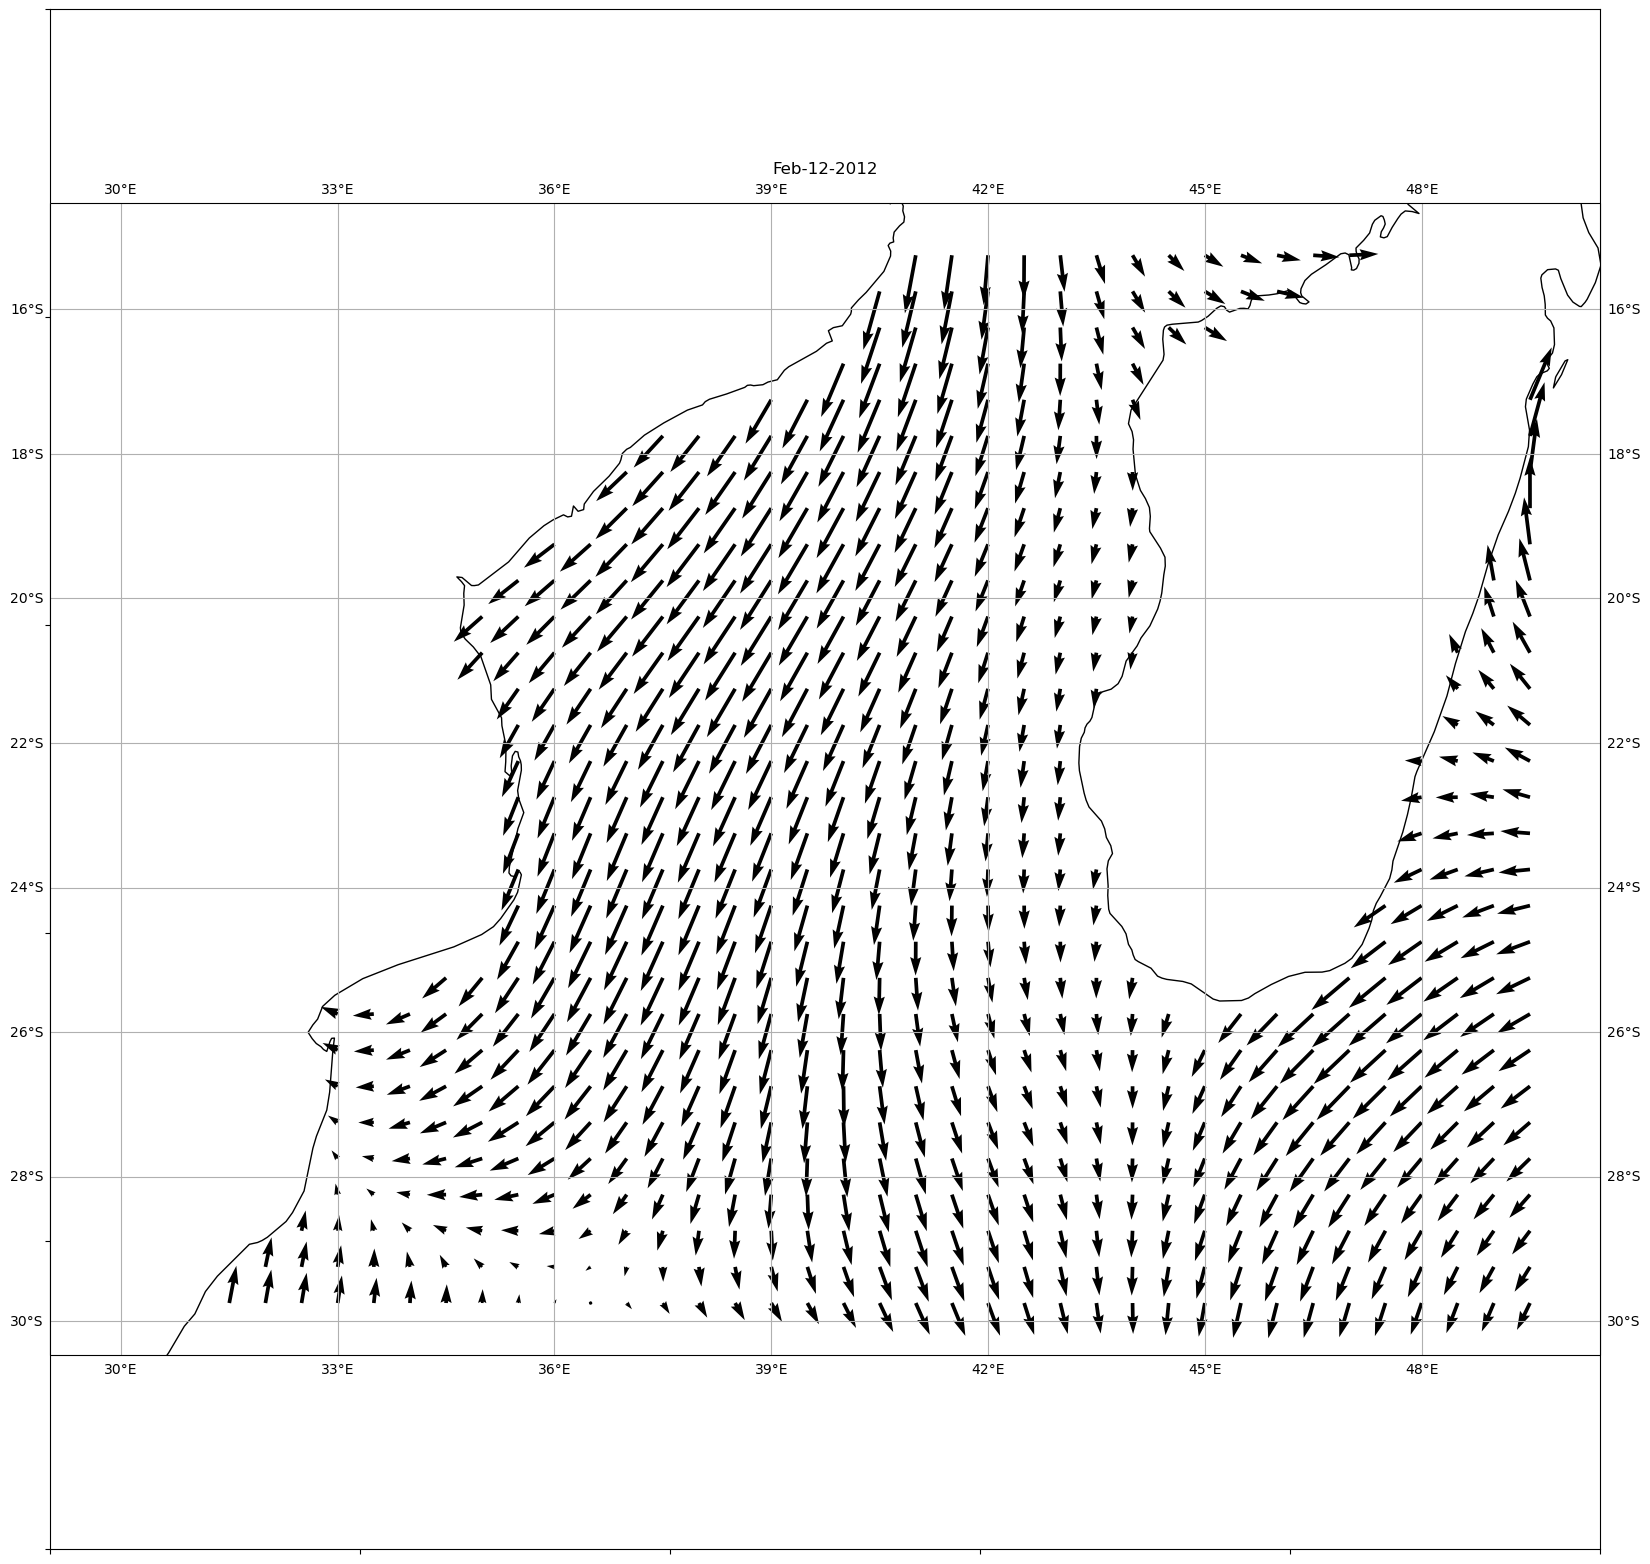

In [74]:
for i in range(len(dfmeridionallist)):
    plotQuiver(i)

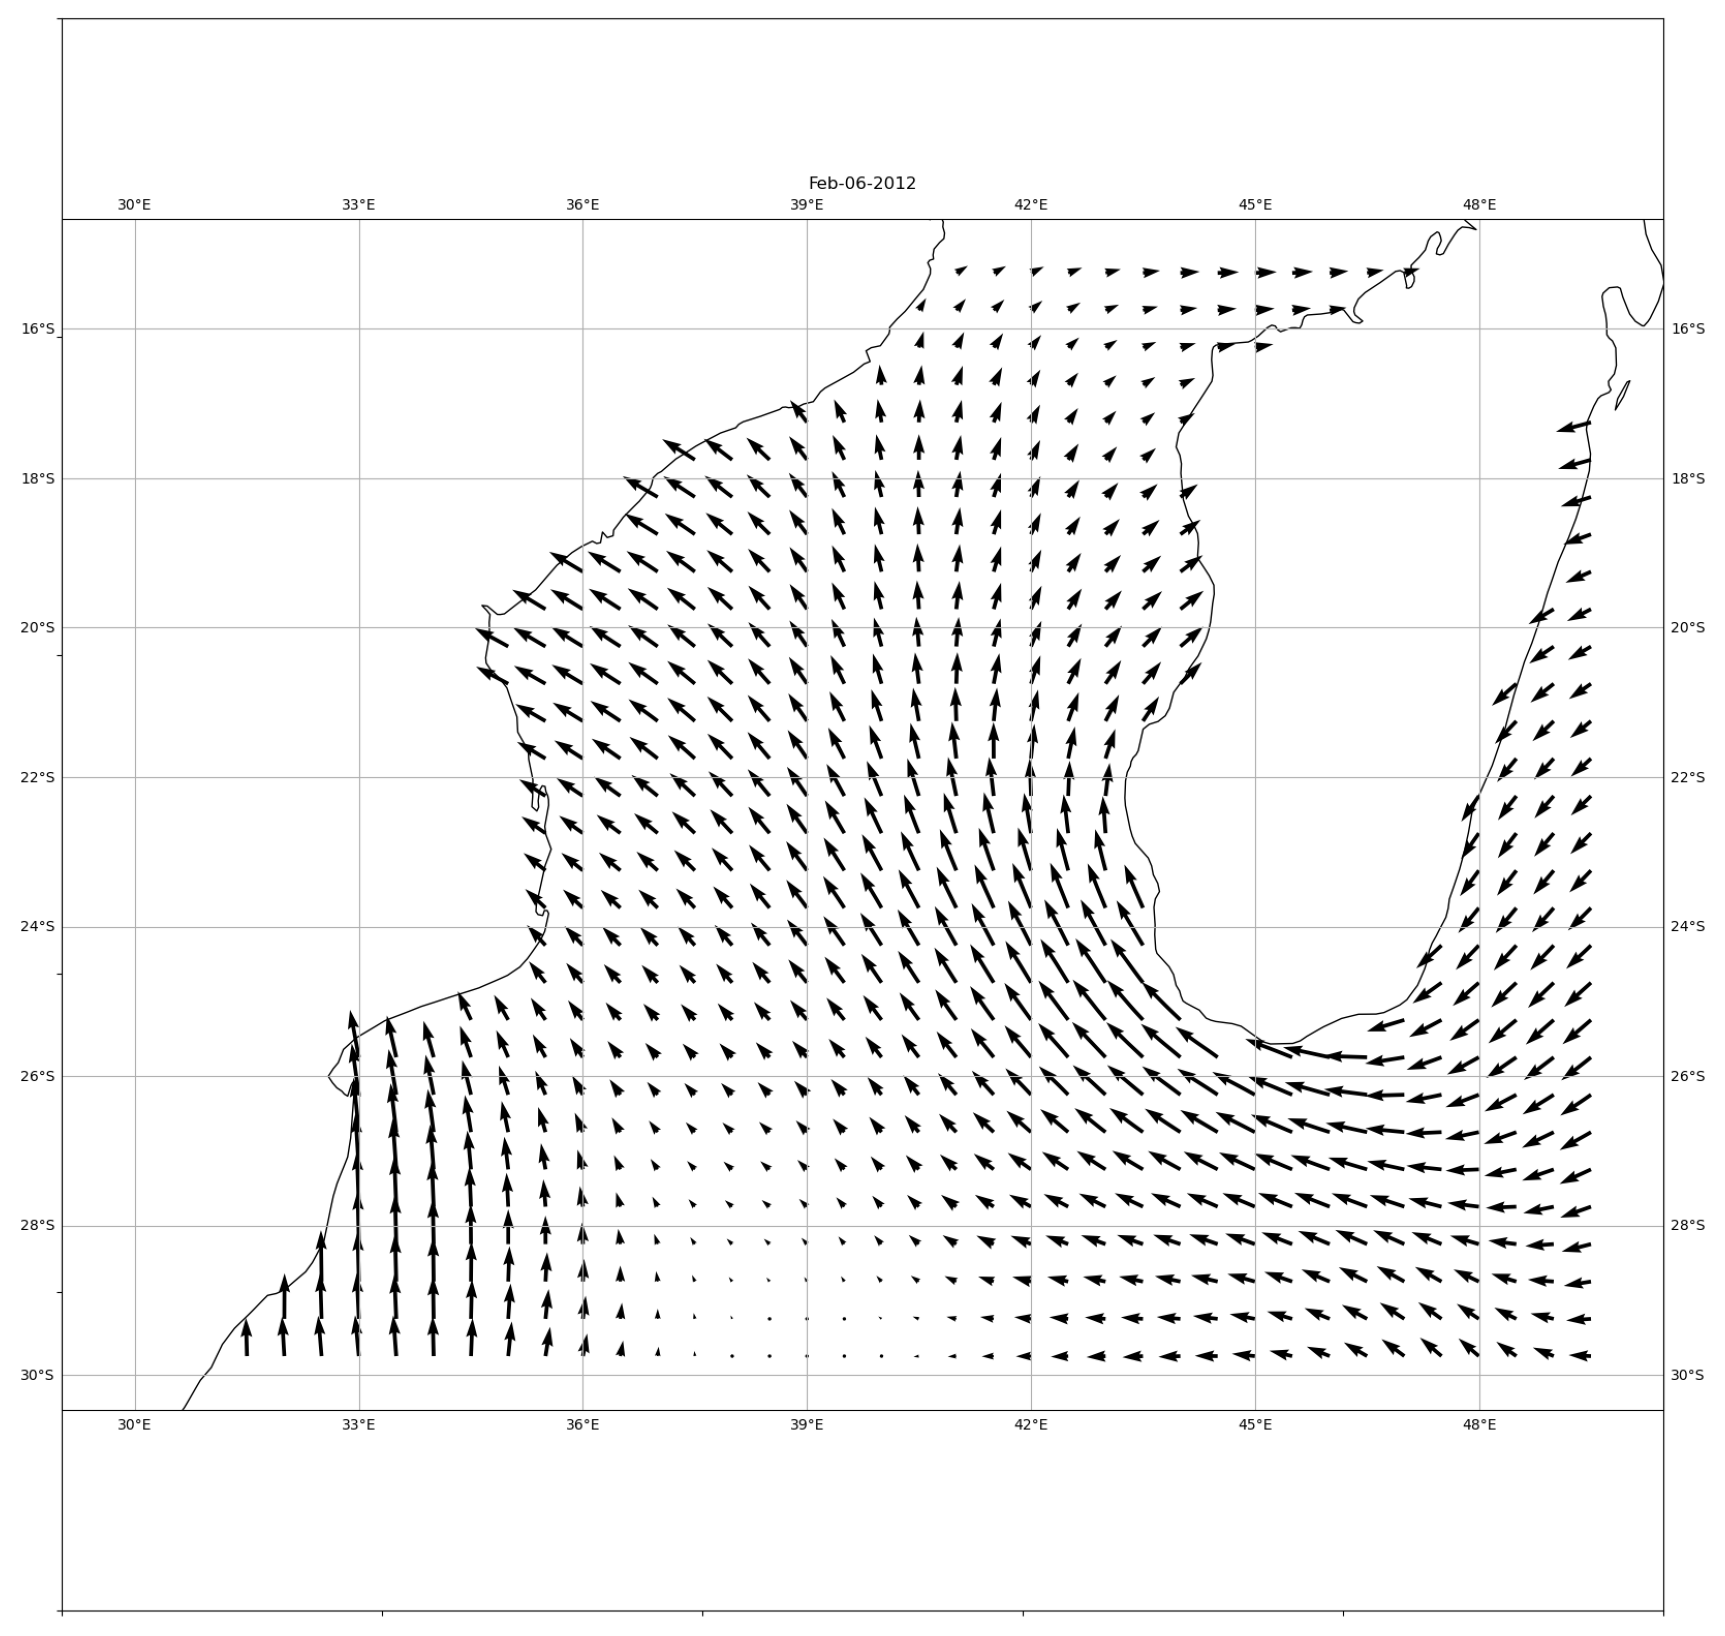

In [30]:
files = glob.glob("./Images/*.png")
image_array = []
for my_file in files:
    
    image = Image.open(my_file)
    image_array.append(image)

# print('image_arrays shape:', np.array(image_array).shape)
fig, ax = plt.subplots(figsize=(22,22))

ax.axis('off')  # Hide the axis
ax.set_frame_on(False)
# Set the initial image
im = ax.imshow(image_array[0],animated=True)

In [31]:
def update(i):
    im.set_array(image_array[i])
    return im,

In [32]:

animation= FuncAnimation(fig, update, frames=len(image_array),blit=True, interval=1000,repeat_delay=20)

animation.save("./Images/animated_GMM.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
